In [3]:
import pandas as pd
import numpy as np

from scipy.interpolate import LinearNDInterpolator
from scipy import interpolate

import pickle
import matplotlib.pyplot as plt

# What does this workbook do?

* Read the APC-Prop Database
* make an interpolator file/object for each propeller for  
   * predict thrust [N] from RPM and speed
   * predict power [W] from RPM and speed
* store these interpolators as serialized/pickled files

In [3]:
#from IPython.display import display, HTML     ####  new version !!!
#display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

#from itables import init_notebook_mode
#init_notebook_mode(all_interactive=True)

### What does an interpolator do:
An interpolator is a function that interpolates between descrete data points.

Example of a Linear 1D interpolation:  
![image](https://scipy-lectures.org/_images/sphx_glr_plot_interpolation_001.png)



As we have to do a 2D interpolation, the case is slightly more complex:
Example of a 2D interpolation:
![image](https://docs.scipy.org/doc/scipy/_images/scipy-interpolate-LinearNDInterpolator-1.png)


### Prop Interpolator:

#### input data:
- (PROP)  
- RPM  
- V_ms  

#### output data:  
- Thrust_N  
- PWR_W




### How the result will look like for Thrust:
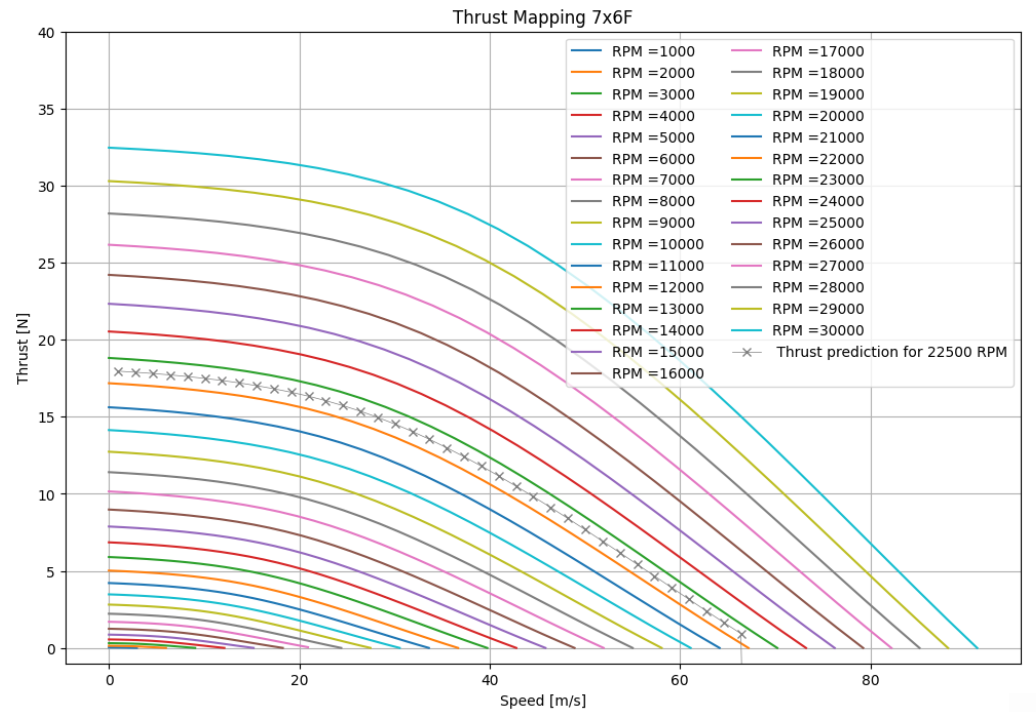






### Read APC-Prop Database

In [4]:
path = "20_APC_interpolator_files/"

In [6]:
filename = "APC-Prop-DB.pkl"
df = pd.read_pickle(filename)

#df.info()

### List all Props in this DataBase

In [7]:
df.PROP.unique()

array(['1225x375', '20x11E', '21x12WE', '20x15E', '12x8', '8x10', '12x8E',
       '16x55MR', '10x10E', '8x4E', '875x85N', '16x6E', '17x8', '7x6F',
       '10x8E', '6x31SF', '55x65E', '6x3', '13x7F', '13x45EP', '88x85',
       '205x12WE', '12x38SF', '11x4', '27x13E', '12x45MRF-RH', '7x4F',
       '14x4W', '9x45MRF-RH', '18x8W', '8x375', '13x47SF', '95x7N',
       '7x6E', '20x10E', '875x875W', '11x11', '8x9', '14x14', '51x50E',
       '11x6-4', '8x41SF', '17x8E', '8x4F', '205x135EPN', '205x105WPN',
       '10x12WE', '7x6W', '65x29', '21x135EPN', '41x41E', '115x6',
       '13x65E(F2B)', '42x4', '11x7E', '475x4', '875x50', '14x11', '6x3F',
       '11x9-4', '95x6', '88x90', '78x6', '135x135', '14x135', '6x45E',
       '65x60', '14x12', '12x11', '13x13N', '12x13N', '17x4W', '205x10PN',
       '14x7E', '9x85', '65x70', '11x12E', '9x41SF', '18x8E', '11x8',
       '55x45E', '7x41SF', '4x45E', '11x14', '11x7', '74x76C', '78x7',
       '14x13N', '10x8', '7x4SF', '17x12E', '95x75N', '10x47SF', '11

### Define Functions

In [13]:
def make_interpolator(prop):

    
    number_of_points = 500    # as we have to sample the speeds we have to define a number of points to divide the speed range of this specific prop

    pdf = df[df.PROP==prop]
    V_min = pdf.V_ms.min()
    V_max = pdf.V_ms.max()

    speeds = np.linspace(V_min,V_max,number_of_points)
    speeds = [round(x,2) for x in speeds]


    propdf = pd.DataFrame()

    for RPM in pdf.RPM.unique():     ## we need to bring the data for each RPM into the same speed range!

        tdf = pdf[pdf.RPM==RPM]
        interp_T = interpolate.interp1d(tdf.V_ms,tdf.Thrust_N,fill_value=-99, bounds_error=False)    # interpolator for Thrust [N]
        interp_P = interpolate.interp1d(tdf.V_ms,tdf.PWR_W,fill_value=-99, bounds_error=False)       # interpolator for Power [W]
    
        ndf = pd.DataFrame()
            
        ndf["V_ms"]    = speeds
        ndf["RPM"]     = RPM
        ndf["Thrust_N"]     = ndf.V_ms.apply(interp_T)
        ndf["PWR_W"]     = ndf.V_ms.apply(interp_P)

        propdf = pd.concat([propdf,ndf.copy()])

    
    x = propdf.V_ms
    y = propdf.RPM
    z_T = propdf.Thrust_N
    z_P = propdf.PWR_W

    interp_T = LinearNDInterpolator((x, y), z_T)
    interp_P = LinearNDInterpolator((x, y), z_P)


    
    
    pickle.dump(interp_T,open(path + prop + "_thrust_interpolator.pkl","wb"))
    pickle.dump(interp_P,open(path + prop + "_power_interpolator.pkl","wb"))


    



#make_interpolator("4x4E-3")

### Make interpolators for ALL files in the database

In [12]:
%%time 

for prop in df.PROP.unique():
    print(prop)
    make_interpolator(prop)

    

1225x375
20x11E
21x12WE
20x15E
12x8
8x10
12x8E
16x55MR
10x10E
8x4E
875x85N
16x6E
17x8
7x6F
10x8E
6x31SF
55x65E
6x3
13x7F
13x45EP
88x85
205x12WE
12x38SF
11x4
27x13E
12x45MRF-RH
7x4F
14x4W
9x45MRF-RH
18x8W
8x375
13x47SF
95x7N
7x6E
20x10E
875x875W
11x11
8x9
14x14
51x50E
11x6-4
8x41SF
17x8E
8x4F
205x135EPN
205x105WPN
10x12WE
7x6W
65x29
21x135EPN
41x41E
115x6
13x65E(F2B)
42x4
11x7E
475x4
875x50
14x11
6x3F
11x9-4
95x6
88x90
78x6
135x135
14x135
6x45E
65x60
14x12
12x11
13x13N
12x13N
17x4W
205x10PN
14x7E
9x85
65x70
11x12E
9x41SF
18x8E
11x8
55x45E
7x41SF
4x45E
11x14
11x7
74x76C
78x7
14x13N
10x8
7x4SF
17x12E
95x75N
10x47SF
11x85E
8x45MR
11x47SF
7x4E
10x3
13x4E
8625x375
88x875
10x45MRF-RH
11x8F
15x8E
20x8
74x77C
26x13E
9x5
15x7E
5x5E
181x10
12x85F
18x12WE
88x95
9x45R-RH
51x45E
20x225EP(CD)
78x4
12x7E-3
15x6
17x10WE
875x825NN
135x14
15x10
12x13
8x5
12x6EP(F2B)
11x5
55x47E
475x475E
13x7
7x6
5x4E-3
25x125E
10x6-4
14x7
13x11
7x5
13x4W
875x875NN
8x8
16x8E
6x6E
13x8
12x45MR
20x8E
7x7
14x12E
20x10PN
14x1